In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_excel('acoustic_extinguisher_fire_dataset.xlsx')

#print(df.head())

# Print basic information about the dataset
df.info()

print('\nClass distribution:\n', df['STATUS'].value_counts())

df.describe()

df.describe(include=['object'])



###    0 indicates the non-extinction state, 1 indicates the extinction state	


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB

Class distribution:
 STATUS
0    8759
1    8683
Name: count, dtype: int64


,FUEL
count,17442
unique,4
top,gasoline
freq,5130


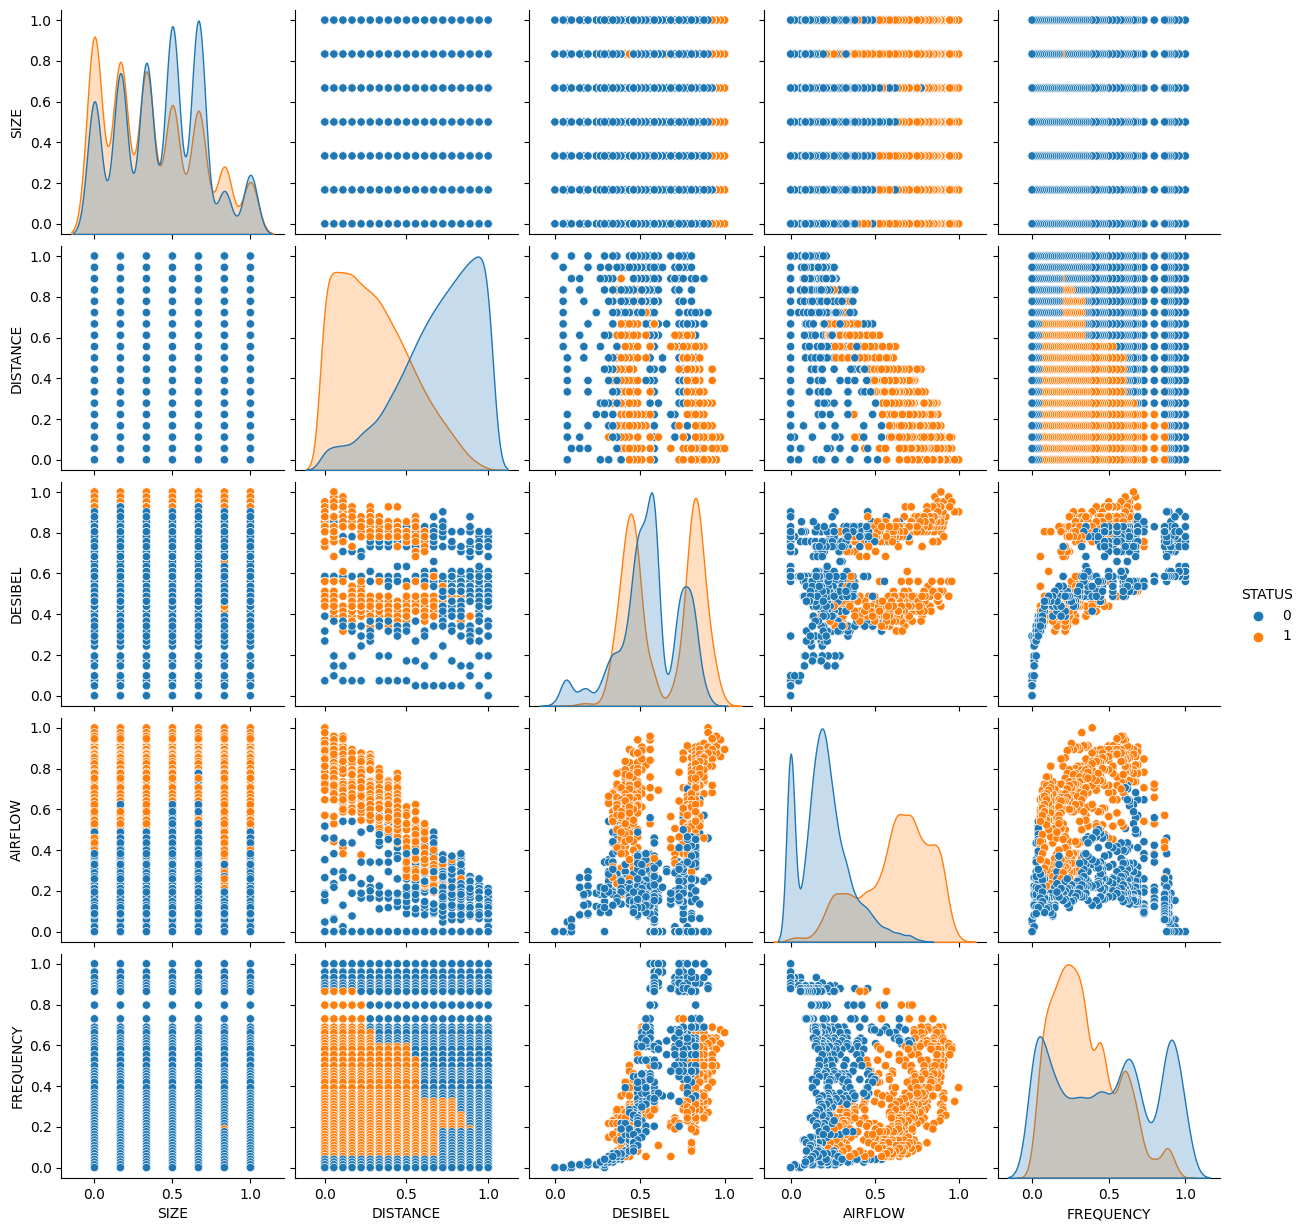

In [3]:

# Scale the numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']] = scaler.fit_transform(df[['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']])

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('STATUS', axis=1)
y = df['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import seaborn as sns

sns.pairplot(df, hue='STATUS')

<Axes: xlabel='FUEL', ylabel='Count'>

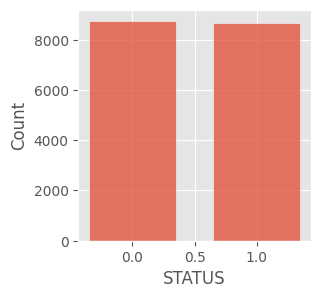

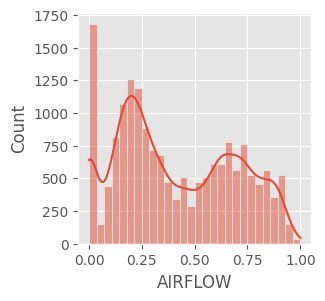

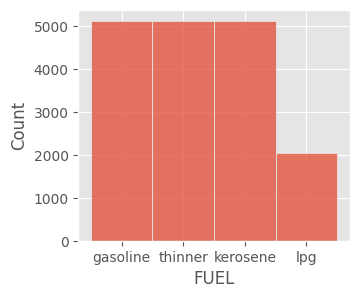

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
sns.histplot(df.STATUS,discrete=True,stat='count',shrink=0.7)

plt.figure(figsize=(3,3))
sns.histplot(df.AIRFLOW, kde=True)

plt.figure(figsize=(3.5,3))
sns.histplot(df.FUEL)





<Axes: xlabel='STATUS', ylabel='AIRFLOW'>

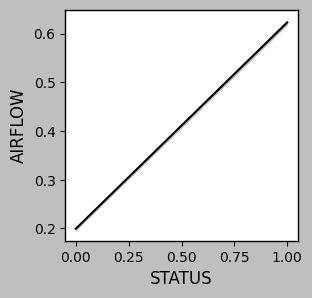

In [70]:

plt.figure(figsize=(3,3))
plt.grid(False)
sns.lineplot(x='STATUS', y='AIRFLOW', data=df)



As we can see the more the airflow the more likely it is to extinguish the flame

no duplicates
SIZE
Skewness: 0.27869986365818017


<Figure size 300x300 with 0 Axes>

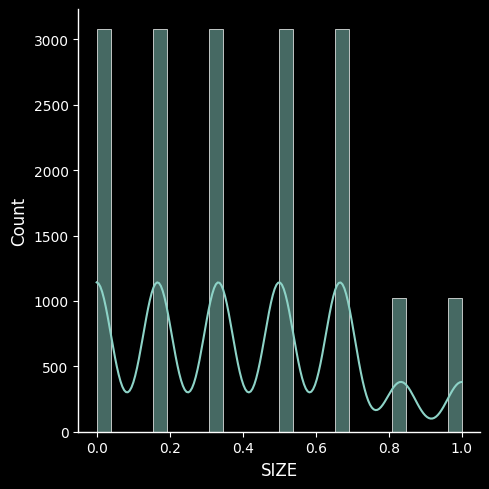

FUEL
Skewness: 0.20959140221588837


<Figure size 300x300 with 0 Axes>

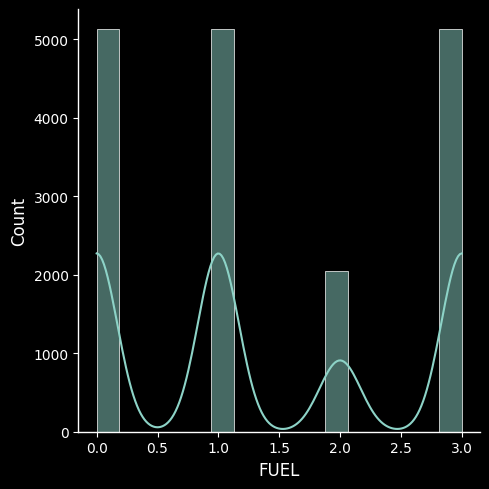

DISTANCE
Skewness: 1.7350452309722133e-16


<Figure size 300x300 with 0 Axes>

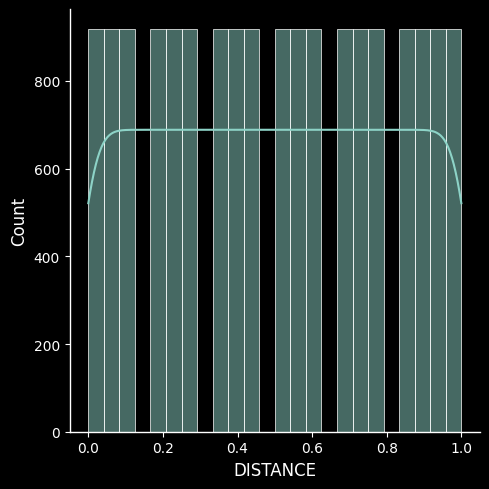

DESIBEL
Skewness: -0.17903195807889302


<Figure size 300x300 with 0 Axes>

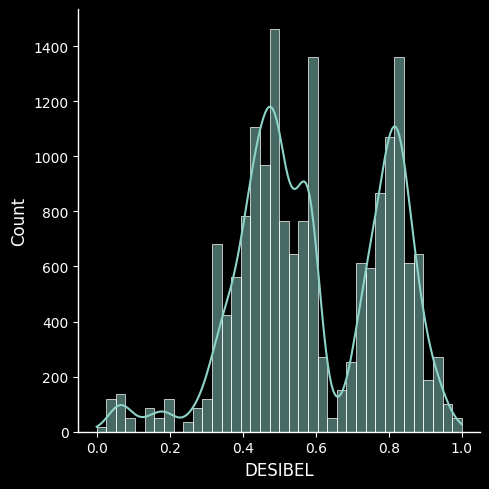

AIRFLOW
Skewness: 0.24434745944124112


<Figure size 300x300 with 0 Axes>

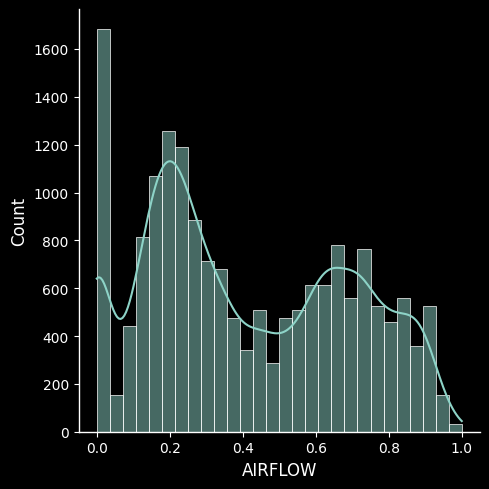

FREQUENCY
Skewness: 0.43485489163496016


<Figure size 300x300 with 0 Axes>

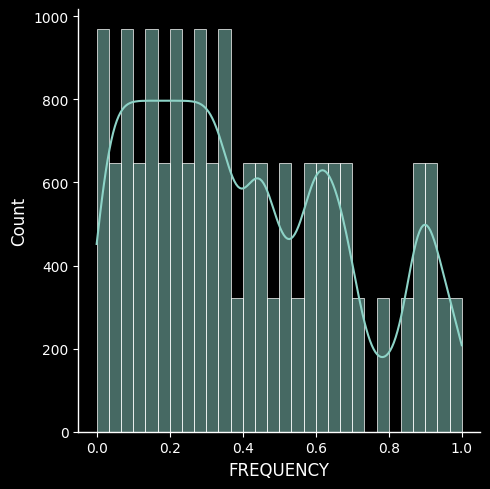

STATUS
Skewness: 0.008714679678955612


<Figure size 300x300 with 0 Axes>

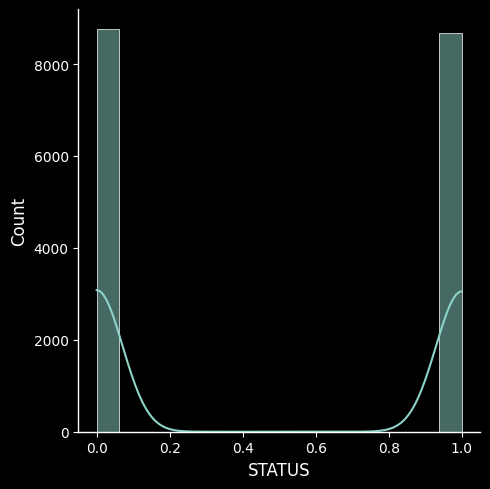

In [85]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
df["FUEL"] = ord_encoder.fit_transform(df[["FUEL"]])
ord_encoder.categories_

df.isnull().sum()

if(df.duplicated().any()==0):
    print("no duplicates")

df.skew()

from scipy.stats import skew
for column in df:
    print(column)
    print(f"Skewness: {skew(df[column])}")
    plt.figure(figsize=(3,3))
    sns.displot(df[column], kde=True)
    plt.grid(False)
    plt.show()

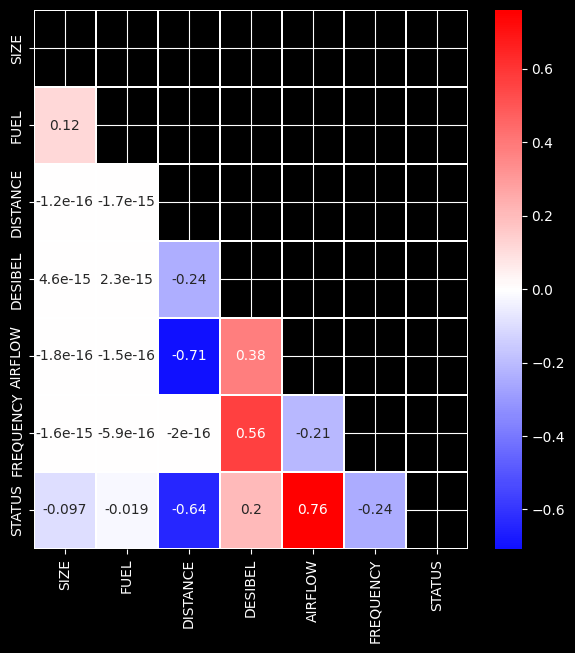

In [132]:
correlation = df.corr()
correlation


import numpy as np

mask = np.zeros_like(correlation)
np.fill_diagonal(mask, True)
mask[np.triu_indices_from(mask)] = True

# Set up the figure and plot the heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(correlation, annot=True, cmap='bwr',center=0 ,linewidths=0.2,mask=mask)

plt.show()